In [99]:
import praw

In [100]:
import csv
import time

# Set up the Reddit API
user_agent = 'MyApp/1.0 by Nashville shootings'
reddit = praw.Reddit(
    client_id = '4xIYX_X2iMiwGhP4aZtE2g',
    client_secret = 'xLymU0PVKlmS3cofzsEKG1fvsiWyrw',
    user_agent = user_agent
)

In [101]:
# CMV: We should stop doing widespread news coverage on mass shootings (school shootings to be specific)
submission = reddit.submission(id='128vpjv')


In [102]:
from datetime import datetime
def process_comments(comments, writer):
    for comment in comments:
        if isinstance(comment, praw.models.MoreComments):
            process_comments(comment.comments(), writer)
        else:
            writer.writerow({
                'title': '',
                'author': comment.author.name if comment.author else '[deleted]',
                'score': comment.score,
                'date': datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                'comment': comment.body
            })
            process_comments(comment.replies, writer)

with open('reddit_data_128vpjv.csv', mode='w', encoding='utf-8', newline='') as csv_file:
    fieldnames = ['title', 'author', 'score', 'date', 'comment']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    writer.writerow({
        'title': submission.title,
        'author': submission.author.name,
        'score': submission.score,
        'date': datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
        'comment': ''
    })

    process_comments(submission.comments, writer)


In [103]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(nltk.corpus.stopwords.words('english'))

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    if pd.isnull(text) :  # Check if text is NaN
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs using regular expressions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Remove punctuations and numbers
    text = re.sub(r"[^a-zA-Z]+", " ", text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    text = " ".join(tokens)
    return text

# Define the path to your input CSV file
input_file = "/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/reddit_data_128vpjv.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Apply preprocessing to the 'text' column
df['comment'] = df['comment'].apply(preprocess_text)

# Define the path for the output CSV file
output_file = "/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/128vpjv.csv"

# Save the preprocessed DataFrame to a new CSV file
df.to_csv(output_file, index=False)

print("Preprocessing complete. Saved preprocessed data to", output_file)


Preprocessing complete. Saved preprocessed data to /Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/128vpjv.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keerthanabandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keerthanabandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
import pandas as pd

# Define the path to your input CSV file
input_file = "/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/reddit_data_128vpjv.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Remove rows where the 'comment' column is equal to 'removed'
df = df[df['comment'] != 'removed' ]
df = df[df['comment'] != 'deleted' ]
# Define the path for the output CSV file
output_file = "/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/file.csv"

# Save the filtered DataFrame to a new CSV file
df.to_csv(output_file, index=False)

print("Completed. Filtered data has been saved to", output_file)


Completed. Filtered data has been saved to /Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/file.csv


In [57]:
import csv
import empath

# Open the input CSV file
with open('file.csv', mode='r', encoding='utf-8') as input_file:

    # Create a CSV reader object for the input file
    reader = csv.DictReader(input_file)

    # Open the output CSV file
    with open('sentiment_file.csv', mode='w', encoding='utf-8', newline='') as output_file:

        # Define the fieldnames for the output CSV file
        fieldnames = reader.fieldnames + ['positive_score', 'negative_score', 'neutral_score', 'emotion']

        # Create a CSV writer object for the output file
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)

        # Write the header row to the output file
        writer.writeheader()

        # Create an instance of the Empath class
        empath_analyzer = empath.Empath()

        # Iterate through each row in the input file
        for row in reader:

            # Analyze the sentiment of the comment using Empath
            sentiment = empath_analyzer.analyze(row['comment'], categories=['positive_emotion', 'negative_emotion', 'neutral_emotion'])

            # Add the sentiment scores to the row dictionary
            row['positive_score'] = sentiment['positive_emotion']
            row['negative_score'] = sentiment['negative_emotion']
            row['neutral_score'] = sentiment['neutral_emotion']

            # Determine the most relevant emotion for the comment
            if sentiment['positive_emotion'] > sentiment['negative_emotion'] and sentiment['positive_emotion'] > sentiment['neutral_emotion']:
                row['emotion'] = 'positive'
            elif sentiment['negative_emotion'] > sentiment['positive_emotion'] and sentiment['negative_emotion'] > sentiment['neutral_emotion']:
                row['emotion'] = 'negative'
            else:
                row['emotion'] = 'neutral'

            # Write the row to the output file
            writer.writerow(row)


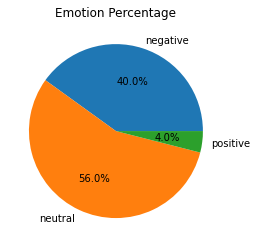

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file
df = pd.read_csv('sentiment_file.csv')

# group by emotion and sum the scores
emotion_counts = df.groupby('emotion').sum()

# create a pie chart
plt.pie(emotion_counts['score'], labels=emotion_counts.index, autopct='%1.1f%%')

# set the title
plt.title('Emotion Percentage')

# display the chart
plt.show()


In [59]:
import pandas as pd
import empath

# create an instance of the empath library
empath_analyzer = empath.Empath()

# read the CSV file
df = pd.read_csv('file.csv')

# define a list of relevant emotions
relevant_emotions = ['anger', 'sadness', 'depression', 'faith', 'hope', 'lost', 'hate', 'love','help','torment','pride']

# add columns for each relevant emotion
for emotion in relevant_emotions:
    df[emotion] = 0

# loop through each comment and analyze the emotions
for i, row in df.iterrows():
    comment = row['comment']
    if isinstance(comment, str):
        emotions = empath_analyzer.analyze(comment, categories=relevant_emotions)
        for emotion in relevant_emotions:
            df.loc[i, emotion] = emotions[emotion]

# add a column for the dominant emotion
df['dominant_emotion'] = df[relevant_emotions].idxmax(axis=1)

# save the updated DataFrame to a new CSV file
df.to_csv('nashville_shooting_sentiment_analysis.csv', index=False)


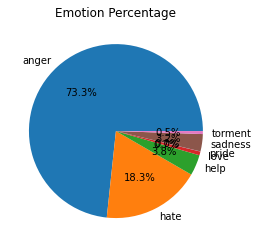

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file
df = pd.read_csv('nashville_shooting_sentiment_analysis.csv')

# group by emotion and sum the scores
emotion_counts = df.groupby('dominant_emotion').sum()

# create a pie chart
plt.pie(emotion_counts['score'], labels=emotion_counts.index, autopct='%1.1f%%')

# set the title
plt.title('Emotion Percentage')

# display the chart
plt.show()


In [61]:
import praw
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# get the post by its ID
post = reddit.submission(id='128vpjv')

# create a list to hold the comments
comments = []

# iterate over the comments and add them to the list
for comment in post.comments.list():
    # check if the comment has sub-comments
    if isinstance(comment, praw.models.MoreComments):
        continue
    else:
        comments.append(comment.body)

# define the list of stop words
stop_words = ['a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'what', 'which', 'this', 'that', 'these', 'those', 'then', 'just', 'so', 'than', 'such', 'both', 'through', 'about', 'for', 'with', 'without', 'within', 'between', 'into', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

# preprocess the comments by removing stop words and tokenizing the text
processed_comments = []
for comment in comments:
    processed_comment = simple_preprocess(comment)
    processed_comment = [word for word in processed_comment if word not in stop_words]
    processed_comments.append(processed_comment)

# create a dictionary from the comments
dictionary = Dictionary(processed_comments)

# create a bag-of-words representation of the comments
bow_corpus = [dictionary.doc2bow(comment) for comment in processed_comments]

# define the number of topics to find
num_topics = 10

# train the LDA model on the comments
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# print the top 10 words for each topic
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f'Topic: {idx}')
    print(f'Words: {topic}\n')


Topic: 0
Words: 0.030*"of" + 0.022*"gun" + 0.020*"is" + 0.015*"have" + 0.014*"us" + 0.013*"are" + 0.012*"countries" + 0.012*"has" + 0.011*"ownership" + 0.010*"you"

Topic: 1
Words: 0.021*"they" + 0.015*"is" + 0.015*"you" + 0.012*"it" + 0.011*"have" + 0.010*"guns" + 0.009*"say" + 0.008*"of" + 0.007*"are" + 0.007*"was"

Topic: 2
Words: 0.026*"it" + 0.022*"is" + 0.019*"news" + 0.017*"you" + 0.013*"think" + 0.013*"they" + 0.012*"of" + 0.011*"people" + 0.010*"do" + 0.009*"want"

Topic: 3
Words: 0.045*"of" + 0.024*"is" + 0.013*"shootings" + 0.012*"we" + 0.011*"they" + 0.010*"are" + 0.010*"mass" + 0.009*"it" + 0.009*"school" + 0.009*"be"

Topic: 4
Words: 0.021*"it" + 0.015*"of" + 0.010*"was" + 0.009*"people" + 0.006*"are" + 0.006*"like" + 0.006*"done" + 0.006*"think" + 0.006*"also" + 0.006*"since"

Topic: 5
Words: 0.034*"of" + 0.025*"it" + 0.021*"is" + 0.014*"you" + 0.014*"be" + 0.014*"they" + 0.013*"are" + 0.010*"have" + 0.010*"we" + 0.009*"school"

Topic: 6
Words: 0.015*"gun" + 0.011*"laws"